In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline
sns.set(style="whitegrid")


In [3]:
!pip install pandas numpy matplotlib seaborn missingno scikit-learn

In [7]:
df = pd.read_csv("C:/Users/anusha/OneDrive/Desktop/titanic_sample.csv")   # or path to your CSV
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.shape           # rows, columns
df.info()          # dtypes and non-null counts
df.describe()      # numeric summary
df.describe(include=['O'])  # categorical summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  15 non-null     int64  
 1   Survived     15 non-null     int64  
 2   Pclass       15 non-null     int64  
 3   Name         15 non-null     object 
 4   Sex          15 non-null     object 
 5   Age          14 non-null     float64
 6   SibSp        15 non-null     int64  
 7   Parch        15 non-null     int64  
 8   Ticket       15 non-null     object 
 9   Fare         15 non-null     float64
 10  Cabin        5 non-null      object 
 11  Embarked     15 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.5+ KB


,Name,Sex,Ticket,Cabin,Embarked
count,15,15,15,5,15
unique,15,2,15,5,3
top,"Braund, Mr. Owen Harris",female,A/5 21171,C85,S
freq,1,8,1,1,12


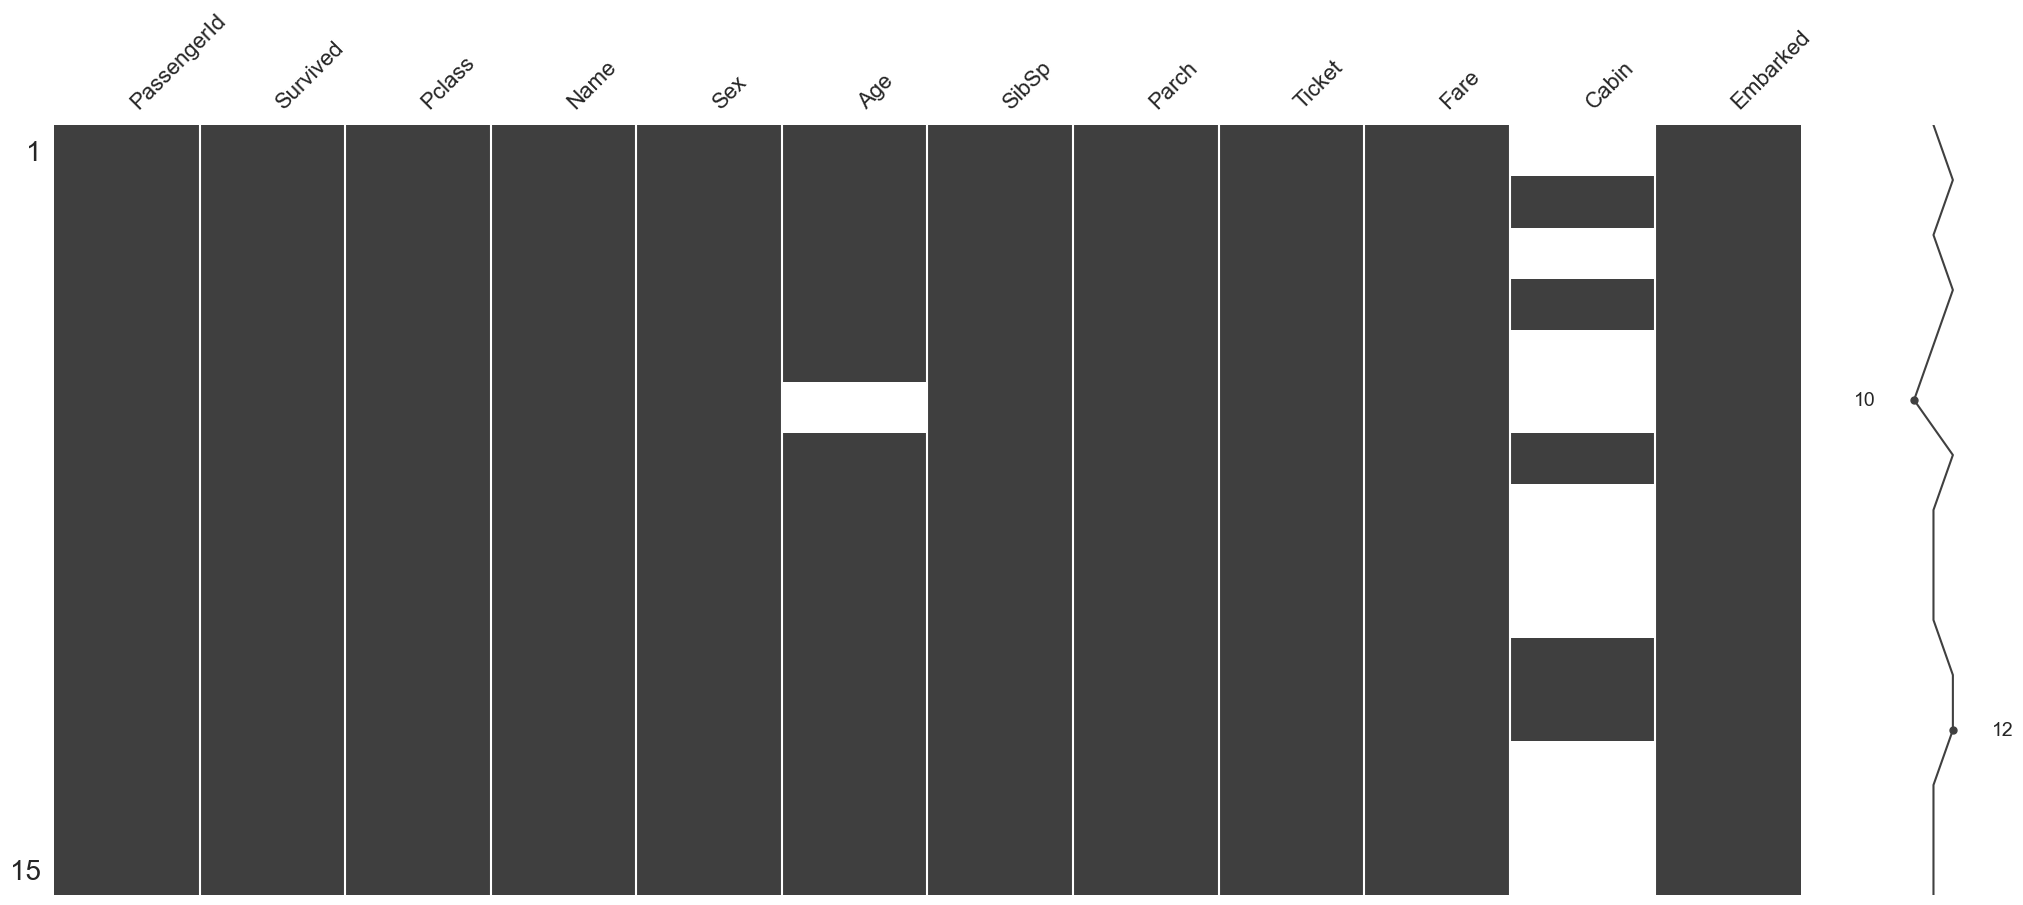

In [11]:
miss = df.isnull().sum().sort_values(ascending=False)
miss_pct = (df.isnull().mean()*100).sort_values(ascending=False)
pd.concat([miss, miss_pct], axis=1, keys=['missing_count', 'missing_pct'])

# Visual
msno.matrix(df)
plt.show()


In [13]:
# simple imputations
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['HasCabin'] = df['Cabin'].notna().astype(int)
df.drop(columns=['Cabin'], inplace=True)  # if you don't need raw Cabin


In [15]:
# Title extraction
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
# Map rare titles into 'Other'
title_counts = df['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Other')

# Numeric encoding
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Age bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0,12,20,40,60,100], labels=['Child','Teen','Adult','Middle','Senior'])


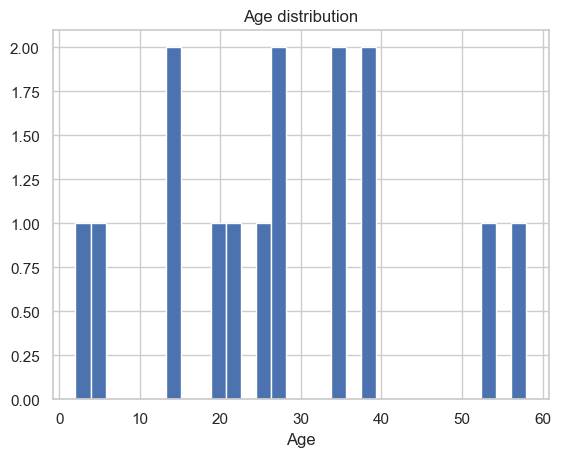

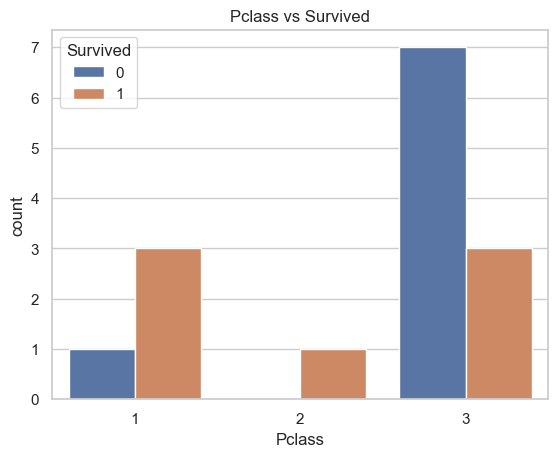

In [18]:
# numeric example
df['Age'].hist(bins=30)
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()

# categorical example
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Pclass vs Survived')
plt.show()


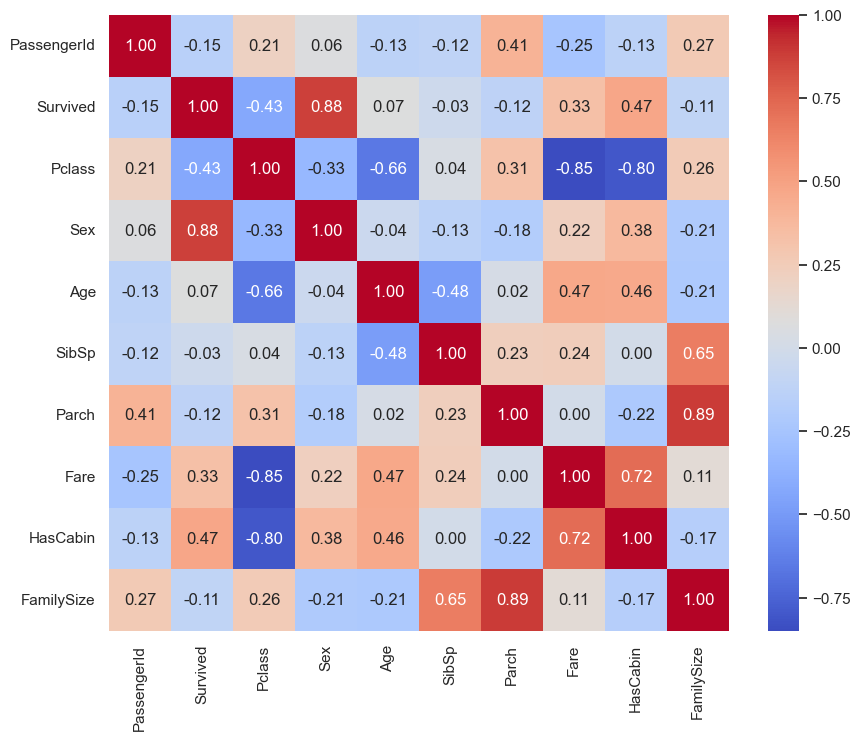

In [20]:
# correlation heatmap
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


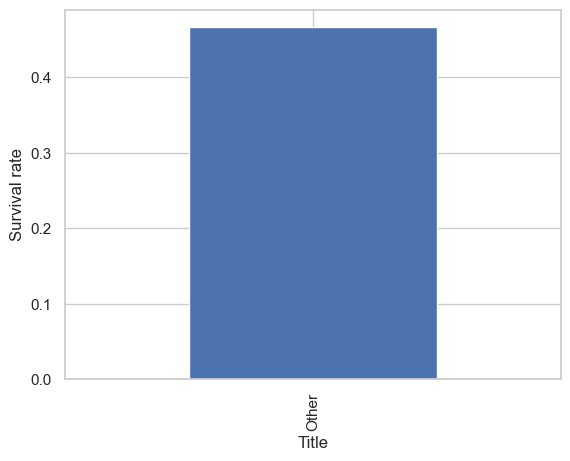

In [22]:
# survival rate by title
df.groupby('Title')['Survived'].mean().sort_values().plot(kind='bar')
plt.ylabel('Survival rate')
plt.show()


In [24]:
df['Fare_log'] = np.log1p(df['Fare'])


In [26]:
X = df[['Pclass','Sex','Age','FamilySize','HasCabin']]  # example
X = pd.get_dummies(df[['Pclass','Sex','AgeBin','Title','FamilySize','HasCabin']], drop_first=True)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
df.to_csv("titanic_cleaned.csv", index=False)
